In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


<div style="background-color:#0A2342;
            font-family:Times New Roman;
            color:#F4D35E;
            padding: 12px;
            line-height: 1.1;
            border-radius: 70px;
            margin-bottom: 0;
            text-align: center;
            font-size: 40px;
            border-style: solid;
            border-color: #FF6B35;
            font-weight: bold;">
    Importing Libraries
</div>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, GRU
from tensorflow.keras.layers import Dropout, Dense, Attention, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau



In [ ]:
import warnings

warnings.filterwarnings('ignore')


<div style="background-color:#0A2342;
            font-family:Times New Roman;
            color:#F4D35E;
            padding: 12px;
            line-height: 1.1;
            border-radius: 70px;
            margin-bottom: 0;
            text-align: center;
            font-size: 40px;
            border-style: solid;
            border-color: #FF6B35;
            font-weight: bold;">
    Compute RUL on Training Data
</div>


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Turbofan Engine Degradation/train_FD004.csv")
df['RUL'] = df.groupby('unit_number')['time_in_cycles'].transform(lambda x: x.max() - x)

display(df.head())


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,320
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,319
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,318
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,317
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,316


<div style="background-color:#0A2342;
            font-family:Times New Roman;
            color:#F4D35E;
            padding: 12px;
            line-height: 1.1;
            border-radius: 70px;
            margin-bottom: 0;
            text-align: center;
            font-size: 40px;
            border-style: solid;
            border-color: #FF6B35;
            font-weight: bold;">
    Data Exploration
</div>


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            61249 non-null  int64  
 1   time_in_cycles         61249 non-null  int64  
 2   operational_setting_1  61249 non-null  float64
 3   operational_setting_2  61249 non-null  float64
 4   operational_setting_3  61249 non-null  float64
 5   sensor_1               61249 non-null  float64
 6   sensor_2               61249 non-null  float64
 7   sensor_3               61249 non-null  float64
 8   sensor_4               61249 non-null  float64
 9   sensor_5               61249 non-null  float64
 10  sensor_6               61249 non-null  float64
 11  sensor_7               61249 non-null  float64
 12  sensor_8               61249 non-null  float64
 13  sensor_9               61249 non-null  float64
 14  sensor_10              61249 non-null  float64
 15  se

In [ ]:
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


,0
unit_number,0
time_in_cycles,0
operational_setting_1,0
operational_setting_2,0
operational_setting_3,0
sensor_1,0
sensor_2,0
sensor_3,0
sensor_4,0
sensor_5,0


In [ ]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [ ]:
print("\n Number of unique engines (unit_number):", df['unit_number'].nunique())


 Number of unique engines (unit_number): 249


In [ ]:
# Display the number of unique operating conditions in FD004
unique_conditions = df[['operational_setting_1', 'operational_setting_2', 'operational_setting_3']].drop_duplicates()
print(f"Number of unique operational conditions: {len(unique_conditions)}")

unique_conditions


Number of unique operational conditions: 10232


,operational_setting_1,operational_setting_2,operational_setting_3
0,42.0049,0.8400,100.0
1,20.0020,0.7002,100.0
2,42.0038,0.8409,100.0
3,42.0000,0.8400,100.0
4,25.0063,0.6207,60.0
...,...,...,...
61034,35.0012,0.8419,100.0
61054,20.0011,0.7019,100.0
61112,20.0078,0.7014,100.0
61131,25.0001,0.6214,60.0


In [ ]:
print("\n📊 Describe:")
df.describe().T



📊 Describe:


,count,mean,std,min,25%,50%,75%,max
unit_number,61249.0,124.325181,71.995350,1.0000,60.0000,126.0000,185.0000,249.0000
time_in_cycles,61249.0,134.311417,89.783389,1.0000,62.0000,123.0000,191.0000,543.0000
operational_setting_1,61249.0,23.999823,14.780722,0.0000,10.0046,25.0014,41.9981,42.0080
operational_setting_2,61249.0,0.571347,0.310703,0.0000,0.2507,0.7000,0.8400,0.8420
operational_setting_3,61249.0,94.031576,14.251954,60.0000,100.0000,100.0000,100.0000,100.0000
sensor_1,61249.0,472.882435,26.436832,445.0000,445.0000,462.5400,491.1900,518.6700
sensor_2,61249.0,579.420056,37.342647,535.4800,549.3300,555.7400,607.0700,644.4200
sensor_3,61249.0,1417.896600,106.167598,1242.6700,1350.5500,1367.6800,1497.4200,1613.0000
sensor_4,61249.0,1201.915359,119.327591,1024.4200,1119.4900,1136.9200,1302.6200,1440.7700
sensor_5,61249.0,8.031626,3.622872,3.9100,3.9100,7.0500,10.5200,14.6200


In [ ]:
# ===============================
# Outlier Detection using IQR
# ===============================
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum().sort_values(ascending=False)

print("\nOutliers per Column:")
print(outlier_counts)



Outliers per Column:
sensor_13                11546
sensor_14                 9162
operational_setting_3     9139
sensor_15                 9139
sensor_8                  9139
sensor_19                 9139
sensor_18                 9139
sensor_11                 3102
RUL                        522
time_in_cycles             522
unit_number                  0
sensor_6                     0
sensor_5                     0
sensor_4                     0
sensor_3                     0
sensor_2                     0
sensor_1                     0
operational_setting_2        0
operational_setting_1        0
sensor_12                    0
sensor_7                     0
sensor_9                     0
sensor_10                    0
sensor_17                    0
sensor_16                    0
sensor_20                    0
sensor_21                    0
dtype: int64


In [ ]:
# ===============================
# Engine & Cycle Analysis
# ===============================
num_engines = df['unit_number'].nunique()
engine_life = df.groupby('unit_number')['time_in_cycles'].max()

print(f"\nTotal Engines: {num_engines}")
print(f"Max Life: {engine_life.max()} cycles")
print(f"Min Life: {engine_life.min()} cycles")
print(f"Mean Life: {engine_life.mean():.1f} cycles")



Total Engines: 249
Max Life: 543 cycles
Min Life: 128 cycles
Mean Life: 246.0 cycles


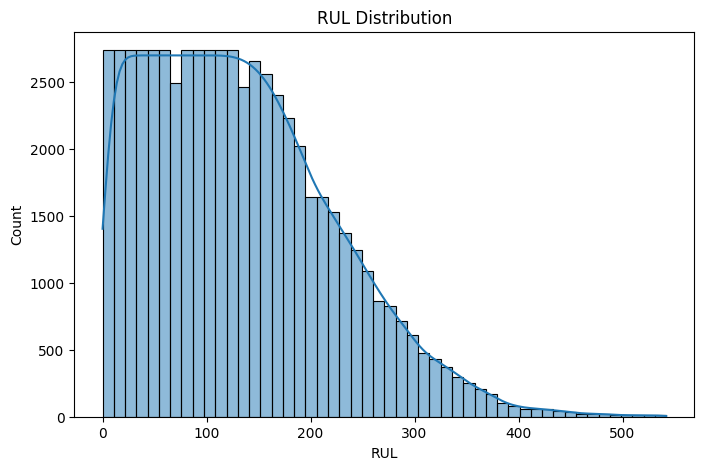

In [ ]:
# ===============================
# Distribution of RUL
# ===============================
plt.figure(figsize=(8,5))
sns.histplot(df['RUL'], bins=50, kde=True)
plt.title('RUL Distribution')
plt.show()


Top Positive Correlations with RUL:
operational_setting_3    0.002303
sensor_18                0.002765
sensor_21                0.002791
sensor_20                0.002812
RUL                      1.000000
Name: RUL, dtype: float64

Top Negative Correlations with RUL:
time_in_cycles   -0.610620
sensor_14        -0.078126
sensor_11        -0.056639
sensor_16        -0.053804
sensor_4         -0.045881
Name: RUL, dtype: float64


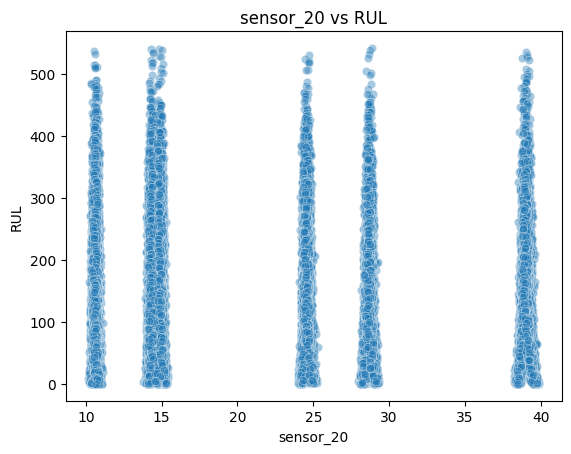

In [ ]:
# ===============================
# Correlation Analysis
# ===============================
corr = df.corr(numeric_only=True)['RUL'].sort_values()
print("\nTop Positive Correlations with RUL:")
print(corr.tail(5))

print("\nTop Negative Correlations with RUL:")
print(corr.head(5))

sensor_cols = [c for c in df.columns if 'sensor' in c]

# Scatter for most important sensor
top_sensor = corr.index[-2]
sns.scatterplot(x=df[top_sensor], y=df['RUL'], alpha=0.4)
plt.title(f'{top_sensor} vs RUL')
plt.show()


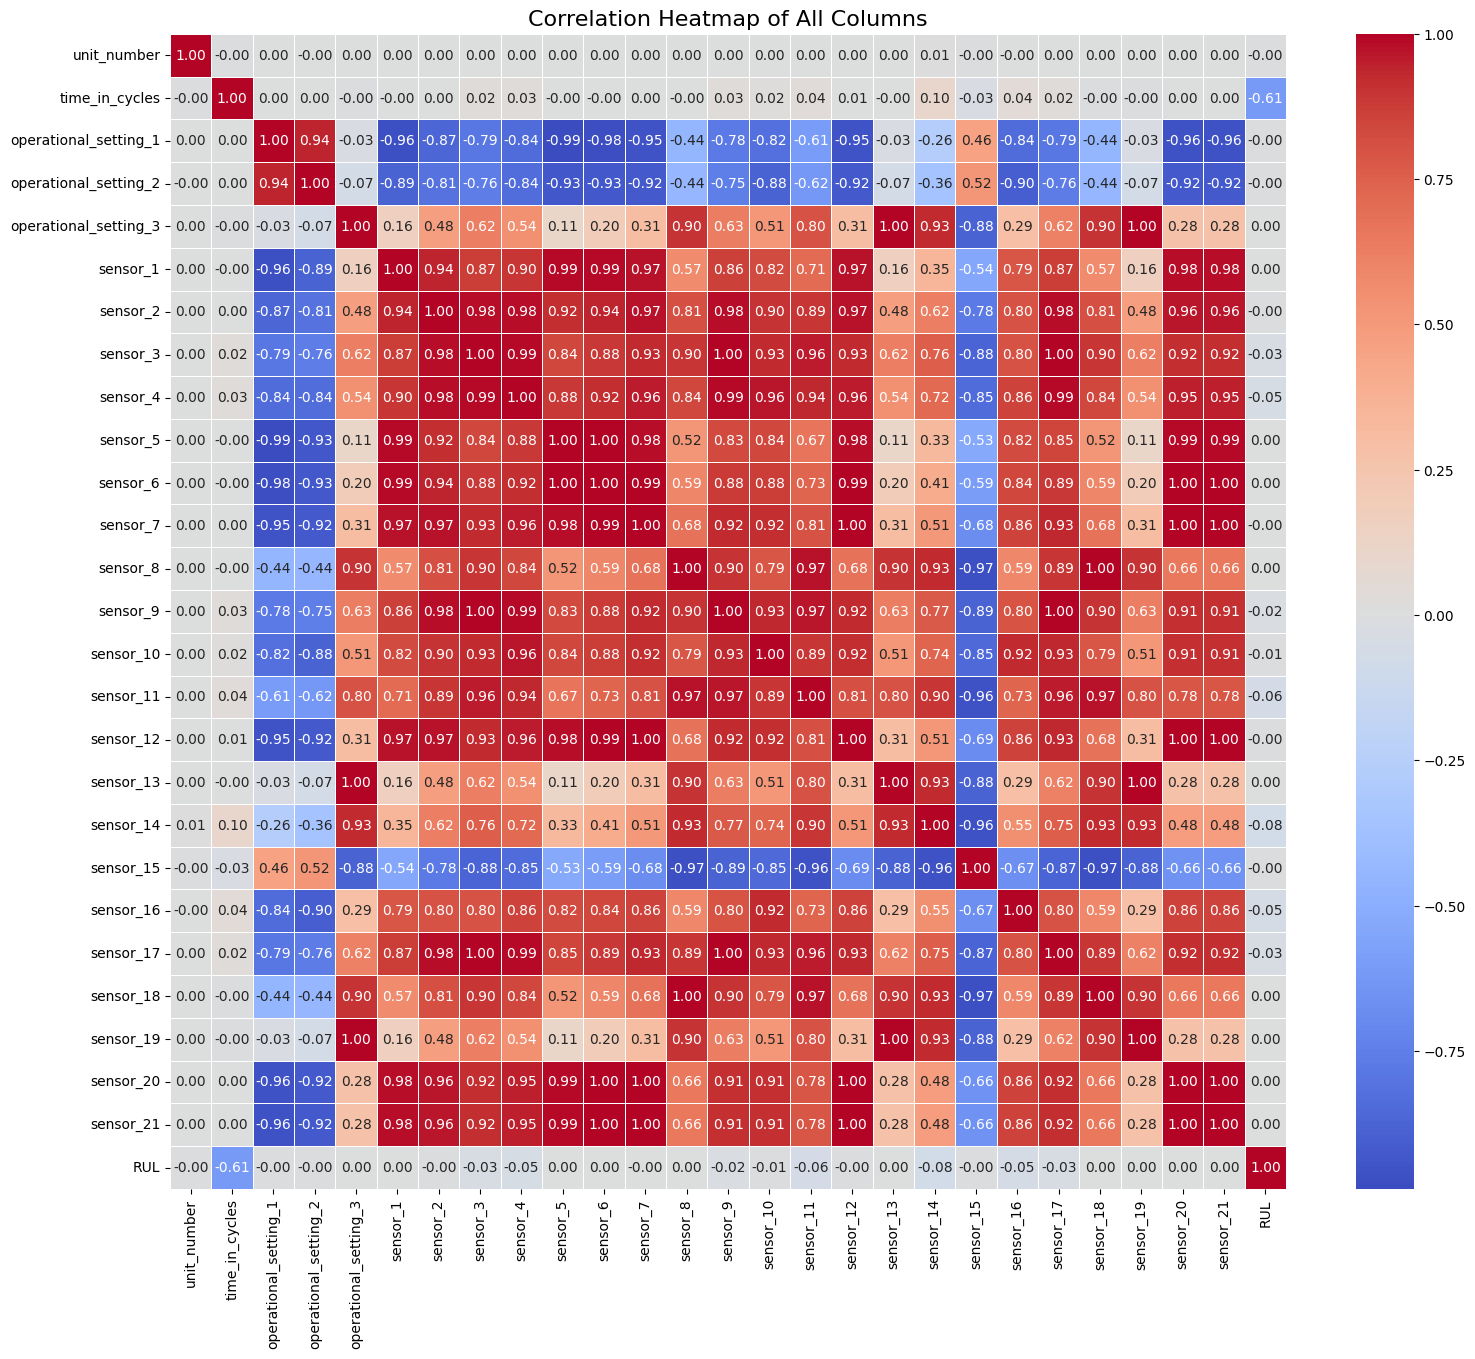

In [ ]:
# ===============================
# Heatmap for Selected Sensors
# ===============================
correlation_matrix_all = df.corr(numeric_only=True)

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of All Columns', fontsize=16)
plt.show()

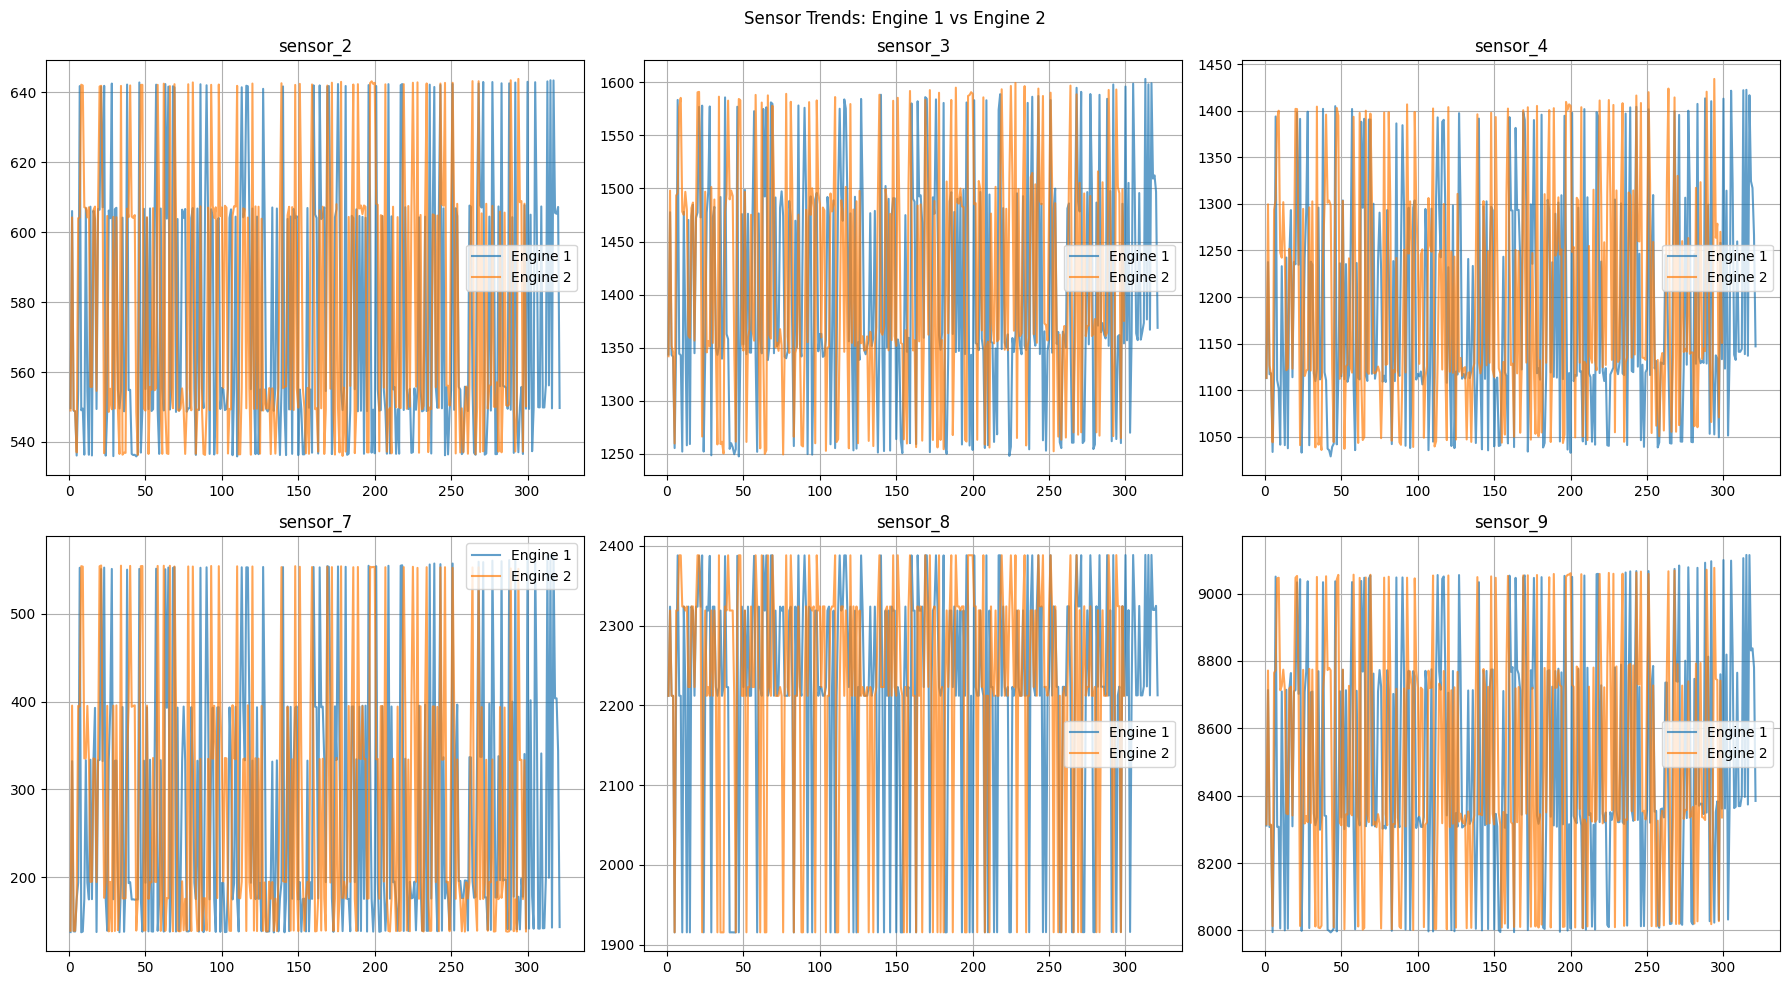

In [ ]:
# ===============================
# Engine Comparison (Example)
# ===============================
e1 = df[df['unit_number'] == 1]
e2 = df[df['unit_number'] == 2]

sensors_to_plot = ['sensor_2','sensor_3','sensor_4','sensor_7','sensor_8','sensor_9']

fig, axes = plt.subplots(2,3, figsize=(18,10))
fig.suptitle('Sensor Trends: Engine 1 vs Engine 2')

for i, s in enumerate(sensors_to_plot):
    r,c = divmod(i,3)
    axes[r,c].plot(e1['time_in_cycles'], e1[s], alpha=0.7, label='Engine 1')
    axes[r,c].plot(e2['time_in_cycles'], e2[s], alpha=0.7, label='Engine 2')
    axes[r,c].set_title(s)
    axes[r,c].grid(True)
    axes[r,c].legend()

plt.tight_layout()
plt.show()

<div style="background-color:#0A2342;
            font-family:Times New Roman;
            color:#F4D35E;
            padding: 12px;
            line-height: 1.1;
            border-radius: 70px;
            margin-bottom: 0;
            text-align: center;
            font-size: 40px;
            border-style: solid;
            border-color: #FF6B35;
            font-weight: bold;">
 Feature Engineering
</div>

   


In [ ]:
# -----------------------------
# Load Data
# -----------------------------
TRAIN_PATH = "/content/drive/MyDrive/Turbofan Engine Degradation/train_FD004.csv"
TEST_PATH  = "/content/drive/MyDrive/Turbofan Engine Degradation/test_FD004.csv"
RUL_PATH   = "/content/drive/MyDrive/Turbofan Engine Degradation/RUL_FD004.csv"

train_df = pd.read_csv(TRAIN_PATH)
test_df  = pd.read_csv(TEST_PATH)
true_rul = pd.read_csv(RUL_PATH, header=None, names=['RUL'])
true_rul = true_rul[pd.to_numeric(true_rul['RUL'], errors='coerce').notnull()].reset_index(drop=True)
true_rul['RUL'] = true_rul['RUL'].astype(float)

# -----------------------------
# Compute RUL for train set
# -----------------------------
train_df['RUL'] = train_df.groupby('unit_number')['time_in_cycles'].transform(lambda x: x.max() - x)

# -----------------------------
# Target Transform (log)
# -----------------------------
train_df['RUL_log'] = np.log1p(train_df['RUL'])

# -----------------------------
# Create Lag Features
# -----------------------------
FEATURE_COLUMNS = [
    'sensor_13', 'sensor_11', 'sensor_15', 'sensor_6', 'sensor_4',
    'sensor_9', 'sensor_2', 'sensor_14', 'sensor_7', 'sensor_8',
    'sensor_12', 'sensor_3', 'sensor_21', 'operational_setting_1', 'sensor_20'
]

lag_features = ['sensor_13', 'sensor_11', 'sensor_15']
for col in lag_features:
    train_df[f'{col}_lag1'] = train_df.groupby('unit_number')[col].shift(1)
    test_df[f'{col}_lag1']  = test_df.groupby('unit_number')[col].shift(1)

train_df = train_df.dropna().reset_index(drop=True)
test_df  = test_df.dropna().reset_index(drop=True)
ALL_FEATURES = FEATURE_COLUMNS + [f'{col}_lag1' for col in lag_features]


In [ ]:
print(train_df.shape, test_df.shape, true_rul.shape)


(61000, 31) (40966, 29) (248, 1)


<div style="background-color:#0A2342;
            font-family:Times New Roman;
            color:#F4D35E;
            padding: 12px;
            line-height: 1.1;
            border-radius: 70px;
            margin-bottom: 0;
            text-align: center;
            font-size: 40px;
            border-style: solid;
            border-color: #FF6B35;
            font-weight: bold;">
    Functions for ML Modeling
</div>



In [ ]:
# -----------------------------
# General Evaluate Function
# -----------------------------
def evaluate(y_true_orig, y_pred_log, name="Evaluation"):
    y_pred_orig = np.expm1(y_pred_log)
    mae  = mean_absolute_error(y_true_orig, y_pred_orig)
    rmse = np.sqrt(mean_squared_error(y_true_orig, y_pred_orig))
    r2   = r2_score(y_true_orig, y_pred_orig)
    print(f"\n📊 {name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}")
    return mae, rmse, r2

# -----------------------------
#  Unit-wise CV Function
# -----------------------------
def unitwise_cv(model, train_df, features, target_col='RUL_log', n_splits=5):
    units = train_df['unit_number'].unique()
    r2_scores, mae_scores, rmse_scores = [], [], []

    for fold, val_units in enumerate(np.array_split(units, n_splits)):
        train_units = np.setdiff1d(units, val_units)
        X_train = train_df[train_df['unit_number'].isin(train_units)][features]
        y_train = train_df[train_df['unit_number'].isin(train_units)][target_col]
        X_val   = train_df[train_df['unit_number'].isin(val_units)][features]
        y_val   = train_df[train_df['unit_number'].isin(val_units)][target_col]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled   = scaler.transform(X_val)

        model.fit(X_train_scaled, y_train)
        y_val_pred = model.predict(X_val_scaled)
        y_val_pred_orig = np.expm1(y_val_pred)

        r2_scores.append(r2_score(np.expm1(y_val), y_val_pred_orig))
        mae_scores.append(mean_absolute_error(np.expm1(y_val), y_val_pred_orig))
        rmse_scores.append(np.sqrt(mean_squared_error(np.expm1(y_val), y_val_pred_orig)))

        print(f"Fold {fold+1} → R²={r2_scores[-1]:.4f}, MAE={mae_scores[-1]:.2f}, RMSE={rmse_scores[-1]:.2f}")

    print("\n📊 Unit-wise CV Average:")
    print(f"R²={np.mean(r2_scores):.4f}, MAE={np.mean(mae_scores):.2f}, RMSE={np.mean(rmse_scores):.2f}")

# -----------------------------
#  Final Train/Val/Test Split
# -----------------------------
units = train_df['unit_number'].unique()
np.random.seed(42)
np.random.shuffle(units)
split_idx = int(len(units)*0.8)
train_units = units[:split_idx]
val_units   = units[split_idx:]

X_train = train_df[train_df['unit_number'].isin(train_units)][ALL_FEATURES]
y_train = train_df[train_df['unit_number'].isin(train_units)]['RUL_log']
X_val   = train_df[train_df['unit_number'].isin(val_units)][ALL_FEATURES]
y_val   = train_df[train_df['unit_number'].isin(val_units)]['RUL_log']

test_last_cycle = test_df.groupby('unit_number').last().reset_index()
X_test = test_last_cycle[ALL_FEATURES]
y_test = true_rul['RUL'].iloc[:len(X_test)]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


<div style="background-color:#0A2342;
            font-family:Times New Roman;
            color:#F4D35E;
            padding: 12px;
            line-height: 1.1;
            border-radius: 70px;
            margin-bottom: 0;
            text-align: center;
            font-size: 40px;
            border-style: solid;
            border-color: #FF6B35;
            font-weight: bold;">
Model Training, Cross-Validation
</div>

In [ ]:
# -----------------------------
# Models Dictionary
# -----------------------------
models = {
    "RandomForest": RandomForestRegressor(n_estimators=300, max_depth=15, min_samples_split=5, min_samples_leaf=4, max_features='sqrt', random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBRegressor(n_estimators=400, max_depth=8, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1),
    "SVR": SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale'),
    "LightGBM": lgb.LGBMRegressor(n_estimators=500, max_depth=8, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)
}

# -----------------------------
# Train, CV & Evaluate all models
# -----------------------------
for name, model in models.items():
    print(f"\n================== {name} ==================")
    unitwise_cv(model, train_df, ALL_FEATURES)

    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred   = model.predict(X_val_scaled)
    y_test_pred  = model.predict(X_test_scaled)

    evaluate(np.expm1(y_train), y_train_pred, f"{name} Train")
    evaluate(np.expm1(y_val), y_val_pred, f"{name} Validation")
    evaluate(y_test, y_test_pred, f"{name} Test")

    comparison = pd.DataFrame({
        'True_RUL': y_test.values,
        'Predicted_RUL': np.round(np.expm1(y_test_pred),2)
    })
    print("\n🔍 Sample Comparison (first 20 units):")
    print(comparison.head(20))


================== RandomForest ==================
Fold 1 → R²=0.5895, MAE=39.26, RMSE=56.17
Fold 2 → R²=0.6006, MAE=37.42, RMSE=52.07
Fold 3 → R²=0.5494, MAE=41.18, RMSE=63.93
Fold 4 → R²=0.5065, MAE=46.28, RMSE=67.17
Fold 5 → R²=0.5838, MAE=38.14, RMSE=54.95

📊 Unit-wise CV Average:
R²=0.5660, MAE=40.46, RMSE=58.86

📊 RandomForest Train: MAE=36.52, RMSE=54.95, R²=0.6167

📊 RandomForest Validation: MAE=40.76, RMSE=60.53, R²=0.5704

📊 RandomForest Test: MAE=24.47, RMSE=33.49, R²=0.6227

🔍 Sample Comparison (first 20 units):
    True_RUL  Predicted_RUL
0       22.0          45.04
1       39.0          71.36
2      107.0         100.68
3       75.0         142.22
4      149.0          96.82
5       78.0         144.70
6       94.0         112.50
7       14.0          13.03
8       99.0          99.10
9      162.0         139.77
10     143.0         171.61
11       7.0           8.57
12      71.0          63.27
13     105.0         120.22
14      12.0          19.30
15     160.0         

In [ ]:

full_results_data = [
    ["RandomForest", 0.5660, 40.46, 58.86, 0.6167, 36.52, 54.95, 0.5704, 40.76, 60.53, 0.6227, 24.47, 33.49],
    ["XGBoost",      0.5821, 39.82, 57.70, 0.7271, 30.86, 46.37, 0.6186, 38.23, 57.03, 0.6023, 24.91, 34.39],
    ["SVR",          0.5601, 41.00, 59.23, 0.5580, 40.43, 59.01, 0.5721, 40.88, 60.41, 0.5079, 27.64, 38.25],
    ["LightGBM",     0.5809, 39.90, 57.80, 0.6301, 36.70, 53.98, 0.6117, 38.66, 57.55, 0.5970, 24.98, 34.61]
]

columns = [
    "Model",

    "CV R²", "CV MAE", "CV RMSE",
    "Train R²", "Train MAE", "Train RMSE",
    "Val R²", "Val MAE", "Val RMSE",
    "Test R²", "Test MAE", "Test RMSE"
]

full_results_df = pd.DataFrame(full_results_data, columns=columns)

print("📊 Full Model Performance Summary ===")
display(full_results_df)


📊 Full Model Performance Summary ===


,Model,CV R²,CV MAE,CV RMSE,Train R²,Train MAE,Train RMSE,Val R²,Val MAE,Val RMSE,Test R²,Test MAE,Test RMSE
0,RandomForest,0.5660,40.46,58.86,0.6167,36.52,54.95,0.5704,40.76,60.53,0.6227,24.47,33.49
1,XGBoost,0.5821,39.82,57.70,0.7271,30.86,46.37,0.6186,38.23,57.03,0.6023,24.91,34.39
2,SVR,0.5601,41.00,59.23,0.5580,40.43,59.01,0.5721,40.88,60.41,0.5079,27.64,38.25
3,LightGBM,0.5809,39.90,57.80,0.6301,36.70,53.98,0.6117,38.66,57.55,0.5970,24.98,34.61


<div style="background-color:#0A2342;
            font-family:Times New Roman;
            color:#F4D35E;
            padding: 12px;
            line-height: 1.1;
            border-radius: 70px;
            margin-bottom: 0;
            text-align: center;
            font-size: 40px;
            border-style: solid;
            border-color: #FF6B35;
            font-weight: bold;">
  LSTM   Model
</div>


In [ ]:
# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)
ALL_FEATURES = FEATURE_COLUMNS



to normalize the features and bring them to the same scale.

In [ ]:
# -----------------------------
# Scale Features
# -----------------------------
scaler = StandardScaler()
scaler.fit(train_df[ALL_FEATURES])

train_scaled = train_df.copy()
test_scaled = test_df.copy()

train_scaled[ALL_FEATURES] = scaler.transform(train_df[ALL_FEATURES])
test_scaled[ALL_FEATURES] = scaler.transform(test_df[ALL_FEATURES])


Sequence Creation: The data is converted into sequences where each sequence represents a window of 30 time-steps (cycles) of sensor readings, making it suitable for LSTM input.

In [ ]:
# -----------------------------
# Sequence Builders
# -----------------------------
WINDOW = 30
FEATS = ALL_FEATURES

def make_train_sequences(df, window):
    X, y = [], []
    for u in sorted(df['unit_number'].unique()):
        sub = df[df.unit_number == u].reset_index(drop=True)
        vals = sub[FEATS].values
        ruls = sub['RUL'].values
        for i in range(len(sub) - window):
            X.append(vals[i:i+window])
            y.append(ruls[i+window])
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

def make_test_sequences_padded(df, window=WINDOW, pad_mode='edge'):
    X, ids = [], []
    for u in sorted(df['unit_number'].unique()):
        sub = df[df.unit_number == u].reset_index(drop=True)
        vals = sub[FEATS].values
        if len(vals) >= window:
            seq = vals[-window:]
        else:
            pad_len = window - len(vals)
            if pad_mode == 'edge':
                pad_block = np.repeat(vals[:1], pad_len, axis=0)
            else:
                pad_block = np.zeros((pad_len, vals.shape[1]))
            seq = np.vstack([pad_block, vals])
        X.append(seq); ids.append(u)
    return np.array(X, dtype=np.float32), ids


In [ ]:
# -----------------------------
# Build Train / Test Sequences
# -----------------------------
X_train, y_train = make_train_sequences(train_scaled, WINDOW)
X_test, test_units = make_test_sequences_padded(test_scaled, WINDOW)

y_test = true_rul['RUL'].values.astype(np.float32)

assert len(y_test) == X_test.shape[0], (len(y_test), X_test.shape[0])

print("Shapes -> X_train:", X_train.shape, "| y_train:", y_train.shape)
print("Shapes -> X_test :", X_test.shape, "| y_test :", y_test.shape)


Shapes -> X_train: (53530, 30, 15) | y_train: (53530,)
Shapes -> X_test : (248, 30, 15) | y_test : (248,)


Dropout: To avoid overfitting, a Dropout layer is added with a rate of 0.2.

Dense Layer: The final dense layer outputs the predicted RUL value.

The model is compiled with the Adam optimizer and mean absolute error (MAE) as the loss function, since we are predicting a continuous variable (RUL).

In [ ]:
# -----------------------------
# Build LSTM Model
# -----------------------------
lstm = keras.Sequential([
    layers.Input(shape=(WINDOW, len(FEATS))),
    layers.LSTM(128, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

lstm.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss='mae',
    metrics=[keras.metrics.RootMeanSquaredError()]
)

lstm.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 128)        │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,249 (489.25 KB)

 Trainable params: 125,249 (489.25 KB)

 Non-trainable params: 0 (0.00 B)

<div style="background-color:#0A2342;
            font-family:Times New Roman;
            color:#F4D35E;
            padding: 12px;
            line-height: 1.1;
            border-radius: 70px;
            margin-bottom: 0;
            text-align: center;
            font-size: 40px;
            border-style: solid;
            border-color: #FF6B35;
            font-weight: bold;">
Model Training
</div>

In [ ]:
# -----------------------------
# Early Stopping
# -----------------------------
es = keras.callbacks.EarlyStopping(
    patience=8,
    restore_best_weights=True
)


# -----------------------------
# Train Model
# -----------------------------
history = lstm.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=256,
    callbacks=[es],
    verbose=1
)

Epoch 1/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 59s 289ms/step - loss: 100.3977 - root_mean_squared_error: 128.3546 - val_loss: 62.1273 - val_root_mean_squared_error: 77.1603
Epoch 2/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 50s 261ms/step - loss: 66.7047 - root_mean_squared_error: 85.2869 - val_loss: 61.9204 - val_root_mean_squared_error: 75.9438
Epoch 3/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 48s 254ms/step - loss: 66.7027 - root_mean_squared_error: 84.8083 - val_loss: 61.9292 - val_root_mean_squared_error: 75.9025
Epoch 4/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 50s 267ms/step - loss: 66.7095 - root_mean_squared_error: 84.7888 - val_loss: 61.9393 - val_root_mean_squared_error: 75.8642
Epoch 5/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 48s 255ms/step - loss: 66.7172 - root_mean_squared_error: 84.7702 - val_loss: 61.9446 - val_root_mean_squared_error: 75.8497
Epoch 6/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 50s 263ms/step - loss: 66.7208 - root_mean_squared_error: 84.7701 - val_loss: 61.9524 - val_root_mean_squared_error: 75.8292
Ep

LSTM Evaluation

In [ ]:
# -----------------------------
# Predict & Evaluate
# -----------------------------
y_pred = lstm.predict(X_test).ravel()

from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---- Train Predictions & Errors ----
train_pred = lstm.predict(X_train).ravel()
train_mae  = mean_absolute_error(y_train, train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_r2   = r2_score(y_train, train_pred)
# ---- Test Predictions & Errors ----
y_pred = lstm.predict(X_test).ravel()
test_mae  = mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2   = r2_score(y_test, y_pred)

print("\n===== TRAIN ERRORS =====")
print(f"Train MAE  : {train_mae:.3f}")
print(f"Train RMSE : {train_rmse:.3f}")
print(f"Train R²   : {train_r2:.3f}")
print("\n===== TEST ERRORS =====")
print(f"Test MAE   : {test_mae:.3f}")
print(f"Test RMSE  : {test_rmse:.3f}")
print(f"Test R²   : {test_r2:.3f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

===== TRAIN ERRORS =====
Train MAE  : 34.090
Train RMSE : 50.655
Train R²   : 0.628

===== TEST ERRORS =====
Test MAE   : 28.270
Test RMSE  : 37.189
Test R²   : 0.535


Train Errors: The model has a Train MAE of 34.09 and RMSE of 50.655, showing decent accuracy.

Test Errors: The Test MAE is 28.27 and RMSE is 37.19, indicating the model performs well on unseen data but can still be improved.

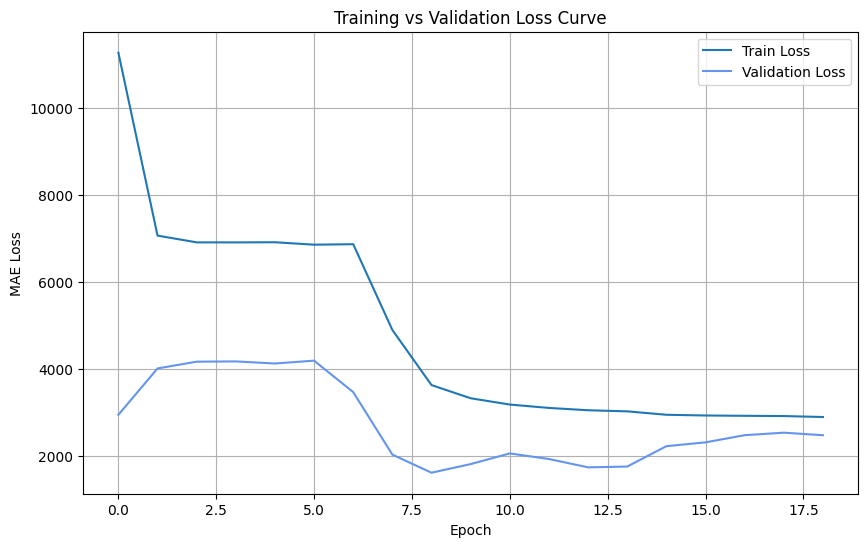

In [ ]:
# ===================
# Loss Curve
# ===================

# Extract losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))

plt.plot(train_loss, label='Train Loss', color='#1f77b4')
plt.plot(val_loss, label='Validation Loss', color='#6495ED')

plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.title('Training vs Validation Loss Curve')
plt.legend()
plt.grid(True)
plt.show()


<div style="background-color:#0A2342;
            font-family:Times New Roman;
            color:#F4D35E;
            padding: 12px;
            line-height: 1.1;
            border-radius: 70px;
            margin-bottom: 0;
            text-align: center;
            font-size: 40px;
            border-style: solid;
            border-color: #FF6B35;
            font-weight: bold;">
CNN + BiGRU + Attention Model
</div>

In [ ]:
selected_features = [
    "operational_setting_1", "operational_setting_2", "operational_setting_3",
    "sensor_1", "sensor_2", "sensor_3", "sensor_4", "sensor_5", "sensor_6",
    "sensor_7", "sensor_8", "sensor_9", "sensor_10", "sensor_11", "sensor_12",
    "sensor_13", "sensor_14", "sensor_15", "sensor_16", "sensor_17",
    "sensor_18", "sensor_19", "sensor_20", "sensor_21"
]


In [ ]:
# ==========================================================
#  Scale Features
# ==========================================================
scaler = MinMaxScaler()
train_df[selected_features] = scaler.fit_transform(train_df[selected_features])
test_df[selected_features]  = scaler.transform(test_df[selected_features])


In [ ]:
# ==========================================================
#  Sequence Builder
# ==========================================================
WINDOW = 30

def create_sequences(df, window=WINDOW):
    X, y = [], []
    for u in df["unit_number"].unique():
        unit_df = df[df["unit_number"] == u].reset_index(drop=True)
        X_unit = unit_df[selected_features].values
        y_unit = unit_df["RUL"].values

        for i in range(len(unit_df) - window):
            X.append(X_unit[i:i+window])
            y.append(y_unit[i+window])

    return np.array(X), np.array(y)


def last_window(df, window=WINDOW):
    X, y = [], []
    for idx, u in enumerate(df["unit_number"].unique()):
        unit_df = df[df["unit_number"] == u].reset_index(drop=True)
        seq = unit_df[selected_features].values[-window:]

        if seq.shape[0] == window:
            X.append(seq)
            y.append(true_rul["RUL"].iloc[idx])

    return np.array(X), np.array(y)


X_train_seq, y_train_seq = create_sequences(train_df)
X_test_seq,  y_test_seq  = last_window(test_df)

print("Train:", X_train_seq.shape, y_train_seq.shape)
print("Test :", X_test_seq.shape, y_test_seq.shape)


Train: (53530, 30, 24) (53530,)
Test : (237, 30, 24) (237,)


CNN Layers: 1D convolutional layers that capture local spatial features from the sensor data.

BiGRU Layer: A Bidirectional GRU layer to capture long-range dependencies in the sequence.

Attention Mechanism: The Attention layer helps the model focus on important time-steps for accurate predictions.

Dense Layer: The output layer that predicts the RUL.

In [ ]:
# ==========================================================
#  CNN + BiGRU + Attention Model
# ==========================================================
seq_len = X_train_seq.shape[1]
n_features = X_train_seq.shape[2]

inputs = Input(shape=(seq_len, n_features))

x = Conv1D(64, kernel_size=5, activation="relu", padding="same")(inputs)
x = MaxPooling1D(2)(x)
x = Dropout(0.2)(x)

x = Conv1D(32, kernel_size=3, activation="relu", padding="same")(x)
x = Dropout(0.2)(x)

x = Bidirectional(GRU(64, return_sequences=True))(x)
x = Dropout(0.3)(x)

att = Attention()([x, x])
x = GlobalAveragePooling1D()(att)

outputs = Dense(1)(x)

model = Model(inputs, outputs)
model.compile(optimizer="adam", loss="mse")
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 30, 24)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 30, 64)    │      7,744 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 15, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 15, 64)    │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 15, 32)    │      6,176 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 15, 32)    │          0 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 15, 128)   │     37,632 │ dropout_4[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 15, 128)   │          0 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 15, 128)   │          0 │ dropout_5[0][0],  │
│ (Attention)         │                   │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ attention[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │        129 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 51,681 (201.88 KB)

 Trainable params: 51,681 (201.88 KB)

 Non-trainable params: 0 (0.00 B)

<div style="background-color:#0A2342;
            font-family:Times New Roman;
            color:#F4D35E;
            padding: 12px;
            line-height: 1.1;
            border-radius: 70px;
            margin-bottom: 0;
            text-align: center;
            font-size: 40px;
            border-style: solid;
            border-color: #FF6B35;
            font-weight: bold;">
Model Training
</div>

In [ ]:
# ==========================================================
# Callbacks (EarlyStopping + LR Scheduler)
# ==========================================================
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=5,
    min_lr=1e-6
)


In [ ]:
# ======================
#  Train Model
# ======================
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=80,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/80
837/837 ━━━━━━━━━━━━━━━━━━━━ 57s 49ms/step - loss: 14264.0156 - val_loss: 2939.4485 - learning_rate: 0.0010
Epoch 2/80
837/837 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - loss: 7143.6685 - val_loss: 4006.1851 - learning_rate: 0.0010
Epoch 3/80
837/837 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - loss: 6822.7041 - val_loss: 4161.4014 - learning_rate: 0.0010
Epoch 4/80
837/837 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - loss: 6822.4590 - val_loss: 4167.8130 - learning_rate: 0.0010
Epoch 5/80
837/837 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - loss: 6824.4624 - val_loss: 4119.7559 - learning_rate: 0.0010
Epoch 6/80
837/837 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - loss: 6806.2485 - val_loss: 4185.1973 - learning_rate: 0.0010
Epoch 7/80
837/837 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - loss: 6810.8364 - val_loss: 3460.6875 - learning_rate: 5.0000e-04
Epoch 8/80
837/837 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - loss: 5538.1289 - val_loss: 2023.4113 - learning_rate: 5.0000e-04
Epoch 9/80
837/837 ━━━━━━━━━━━━━━━━━━━━ 37s 44m

GRU Evaluation

In [ ]:
# =============================
# Evaluate Train & Test
# =============================

# ---- Predict ----
y_pred_train = model.predict(X_train_seq).flatten()
y_pred_test  = model.predict(X_test_seq).flatten()

# ---- Train Metrics ----
mae_train  = mean_absolute_error(y_train_seq, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train_seq, y_pred_train))
r2_train   = r2_score(y_train_seq, y_pred_train)

# ---- Test Metrics ----
mae_test  = mean_absolute_error(y_test_seq, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test_seq, y_pred_test))
r2_test   = r2_score(y_test_seq, y_pred_test)

# ---- Print ----
print("\n===== TRAIN ERRORS =====")
print(f"Train MAE : {mae_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R^2 : {r2_train:.3f}")

print("\n===== TEST ERRORS =====")
print(f"Test MAE : {mae_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R^2 : {r2_test:.3f}")


1673/1673 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

===== TRAIN ERRORS =====
Train MAE : 41.35
Train RMSE: 57.40
Train R^2 : 0.523

===== TEST ERRORS =====
Test MAE : 32.01
Test RMSE: 40.08
Test R^2 : 0.433


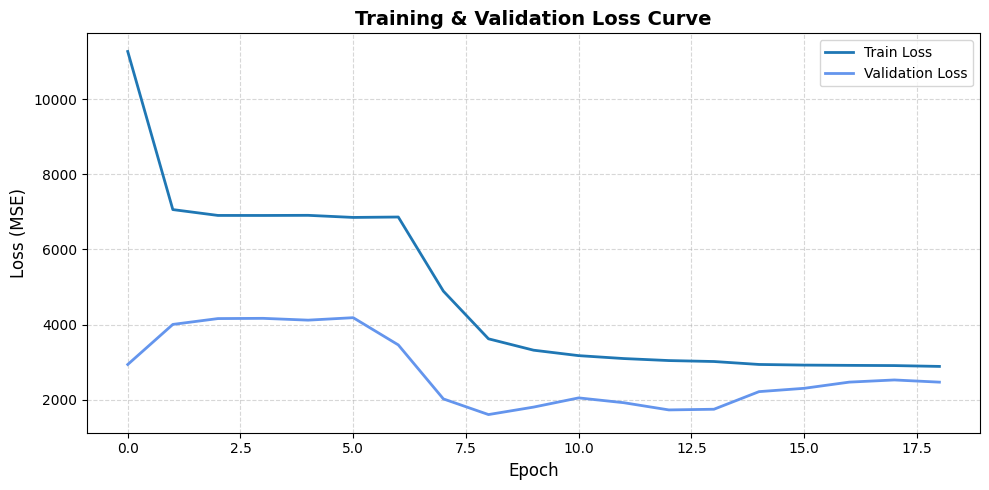

In [ ]:
# =========================================
#  Loss Curve
# =========================================

plt.figure(figsize=(10,5))

plt.plot(history.history['loss'], label='Train Loss', color='#1f77b4', linewidth=2)
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss', color='#6495ED', linewidth=2)

plt.title('Training & Validation Loss Curve', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<div style="background-color:#0A2342;
            font-family:Times New Roman;
            color:#F4D35E;
            padding: 12px;
            line-height: 1.1;
            border-radius: 70px;
            margin-bottom: 0;
            text-align: center;
            font-size: 40px;
            border-style: solid;
            border-color: #FF6B35;
            font-weight: bold;">
Model Performance Table
</div>


In [ ]:

data = {
    "Model": ["RandomForest", "XGBoost", "SVR", "LightGBM", "LSTM", "CNN+BiGRU+Attention"],
    "Train R²": [0.6167, 0.7271, 0.5580, 0.6301, 0.628, 0.523],
    "Train MAE": [36.52, 30.86, 40.43, 36.70, 34.09, 41.35],
    "Train RMSE": [54.95, 46.37, 59.01, 53.98, 50.655, 57.40],
    "Test R²": [0.6227, 0.6023, 0.5079, 0.5970, 0.535, 0.433],
    "Test MAE": [24.47, 24.91, 27.64, 24.98, 28.27, 32.01],
    "Test RMSE": [33.49, 34.39, 38.25, 34.61, 37.189, 40.08]
}

df = pd.DataFrame(data)

def highlight_best(s, bigger_is_better=True):
    color = "#6495ED"  # color
    if bigger_is_better:
        best = s.max()
        return [f'background-color: {color}' if v == best else '' for v in s]
    else:
        best = s.min()
        return [f'background-color: {color}' if v == best else '' for v in s]

num_cols = ["Train R²", "Train MAE", "Train RMSE", "Test R²", "Test MAE", "Test RMSE"]

styled_df = df.style \
    .apply(highlight_best, subset=["Train R²", "Test R²"], bigger_is_better=True) \
    .apply(highlight_best, subset=["Train MAE", "Train RMSE", "Test MAE", "Test RMSE"], bigger_is_better=False) \
    .format({col: "{:.3f}" for col in num_cols}) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f7f7f7'), ('color', 'black'), ('text-align', 'center')]
    }])

styled_df


,Model,Train R²,Train MAE,Train RMSE,Test R²,Test MAE,Test RMSE
0,RandomForest,0.617,36.520,54.950,0.623,24.470,33.490
1,XGBoost,0.727,30.860,46.370,0.602,24.910,34.390
2,SVR,0.558,40.430,59.010,0.508,27.640,38.250
3,LightGBM,0.630,36.700,53.980,0.597,24.980,34.610
4,LSTM,0.628,34.090,50.655,0.535,28.270,37.189
5,CNN+BiGRU+Attention,0.523,41.350,57.400,0.433,32.010,40.080


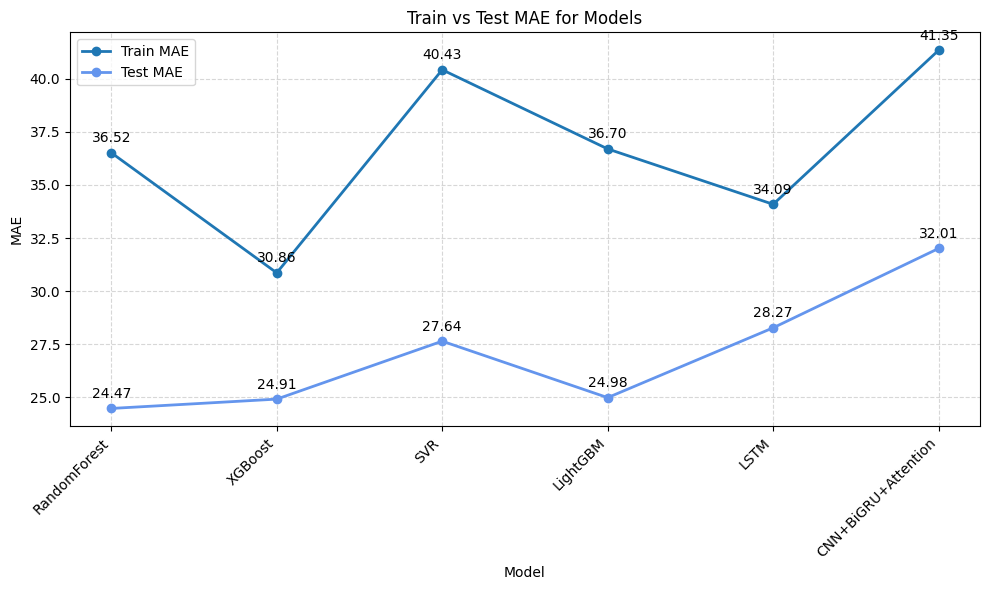

In [ ]:
# =========================================
# Train vs Test MAE Curve for Models
# =========================================

plt.figure(figsize=(10,6))

plt.plot(df["Model"], df["Train MAE"], marker='o', label='Train MAE', linewidth=2, color='#1f77b4')
plt.plot(df["Model"], df["Test MAE"], marker='o', label='Test MAE', linewidth=2, color='#6495ED')

for i, v in enumerate(df["Train MAE"]):
    plt.text(i, v+0.5, f"{v:.2f}", ha='center', color='black', fontsize=10)
for i, v in enumerate(df["Test MAE"]):
    plt.text(i, v+0.5, f"{v:.2f}", ha='center', color='black', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("Train vs Test MAE for Models")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

XGBoost,RandomForest which means it performed the best out of all

XGBoost can effectively model non-linear relationships
Gradient Boosting Technique
XGBoost has built-in regularization (L1 & L2), which helps to prevent overfitting,

<div style="background-color:#0A2342;
            font-family:Times New Roman;
            color:#F4D35E;
            padding: 12px;
            line-height: 1.1;
            border-radius: 70px;
            margin-bottom: 0;
            text-align: center;
            font-size: 40px;
            border-style: solid;
            border-color: #FF6B35;
            font-weight: bold;">
Save Model & Scaler
</div>

In [ ]:
# =====================================================
# 💾 Save RandomForest model after training is complete
# =====================================================
import pickle
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(models["RandomForest"], f)

print("\n RandomForest model saved successfully as 'random_forest_model.pkl'")



 RandomForest model saved successfully as 'random_forest_model.pkl'


In [ ]:
from joblib import dump

dump(scaler, "scaler.pkl")


['scaler.pkl']